#### Binary classification: Confusion matrix

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/study_hours.csv')
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Hours,0.5,0.75,1.0,1.25,1.5,1.75,1.75,2.0,2.25,2.5,2.75,3.0,3.25,3.5,4.0,4.25,4.5,4.75,5.0,5.5
Pass,0.0,0.00,0.0,0.00,0.0,0.00,1.00,0.0,1.00,0.0,1.00,0.0,1.00,0.0,1.0,1.00,1.0,1.00,1.0,1.0


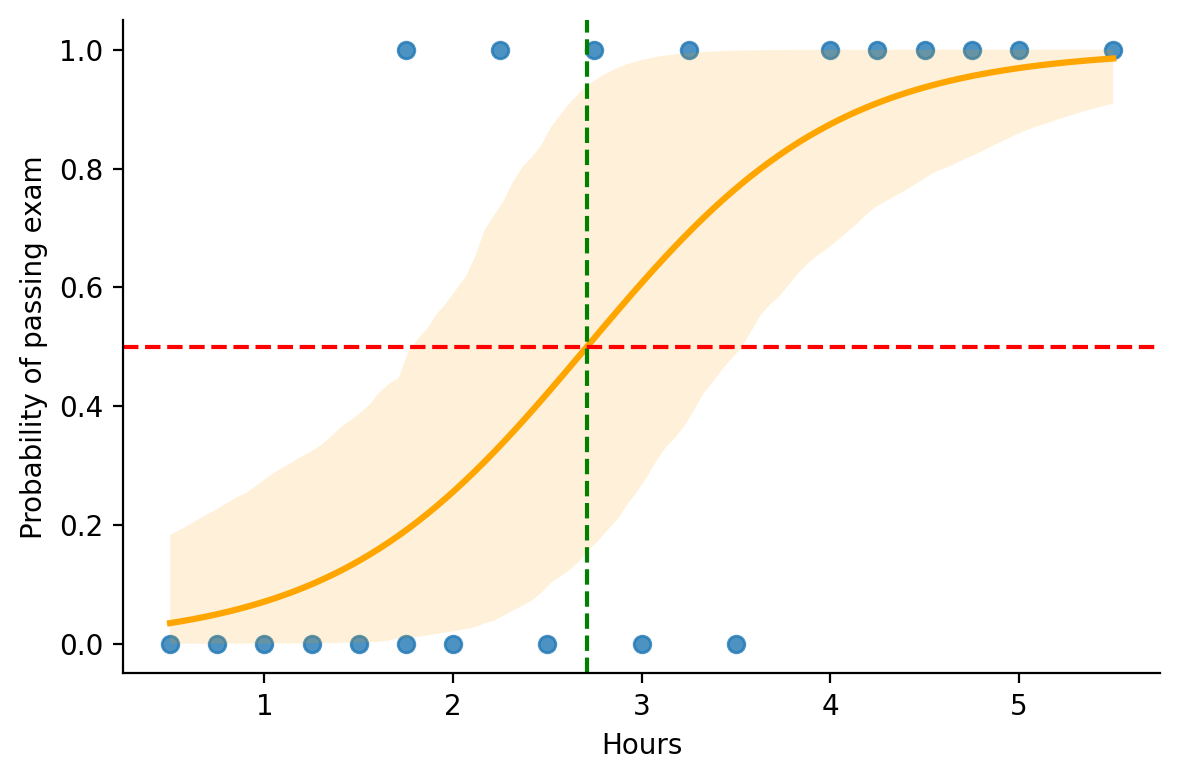

In [3]:
sns.lmplot(x='Hours', y='Pass', data=df,
            logistic=True, height=4, aspect=1.5,
            line_kws={'color':'orange'})
plt.ylabel('Probability of passing exam')
plt.axvline(2.71, color='green', linestyle='--')
plt.axhline(.5, color='red', linestyle='--')

#### sklearn: LogisticRegression

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
test_size=.05
X_train, X_test, y_train, y_test = train_test_split(df[['Hours']], df.Pass, 
                                    test_size=test_size,
                                    random_state = 3)

In [6]:
X_train

,Hours
2,1.00
1,0.75
17,4.75
4,1.50
16,4.50
6,1.75
7,2.00
15,4.25
12,3.25
9,2.50


In [7]:
y_train

2     0
1     0
17    1
4     0
16    1
6     1
7     0
15    1
12    1
9     0
11    0
19    1
18    1
13    0
5     0
0     0
8     1
3     0
10    1
Name: Pass, dtype: int64

In [8]:
model = LogisticRegression()
model

LogisticRegression()

In [9]:
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
model.score(X_train, y_train)

0.7368421052631579

In [13]:
predicted = model.predict(X_train)
predicted

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

#### Confusion matrix

In [14]:
from sklearn import metrics

In [15]:
X_train['Hours'].values

array([1.  , 0.75, 4.75, 1.5 , 4.5 , 1.75, 2.  , 4.25, 3.25, 2.5 , 3.  ,
       5.5 , 5.  , 3.5 , 1.75, 0.5 , 2.25, 1.25, 2.75])

In [16]:
y_train.values

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1],
      dtype=int64)

In [17]:
predicted

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [18]:
metrics.confusion_matrix(y_train, predicted)

array([[8, 2],
       [3, 6]], dtype=int64)

In [19]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, predicted).ravel()

In [23]:
print(metrics.classification_report(y_train, predicted))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.75      0.67      0.71         9

    accuracy                           0.74        19
   macro avg       0.74      0.73      0.73        19
weighted avg       0.74      0.74      0.74        19

